In [1]:
from keras.models import Sequential
import seaborn as sns
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
ColumnNames = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]

In [3]:
training_dataset = pd.read_csv('glass.csv',names = ColumnNames, header = 0)
training_dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [4]:
df = training_dataset.drop("Type", axis=1)
y = training_dataset["Type"]
df = df.sample(frac=1)

In [5]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
150,1.51665,13.14,3.45,1.76,72.48,0.60,8.38,0.00,0.17
148,1.51670,13.24,3.57,1.38,72.70,0.56,8.44,0.00,0.10
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00
128,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


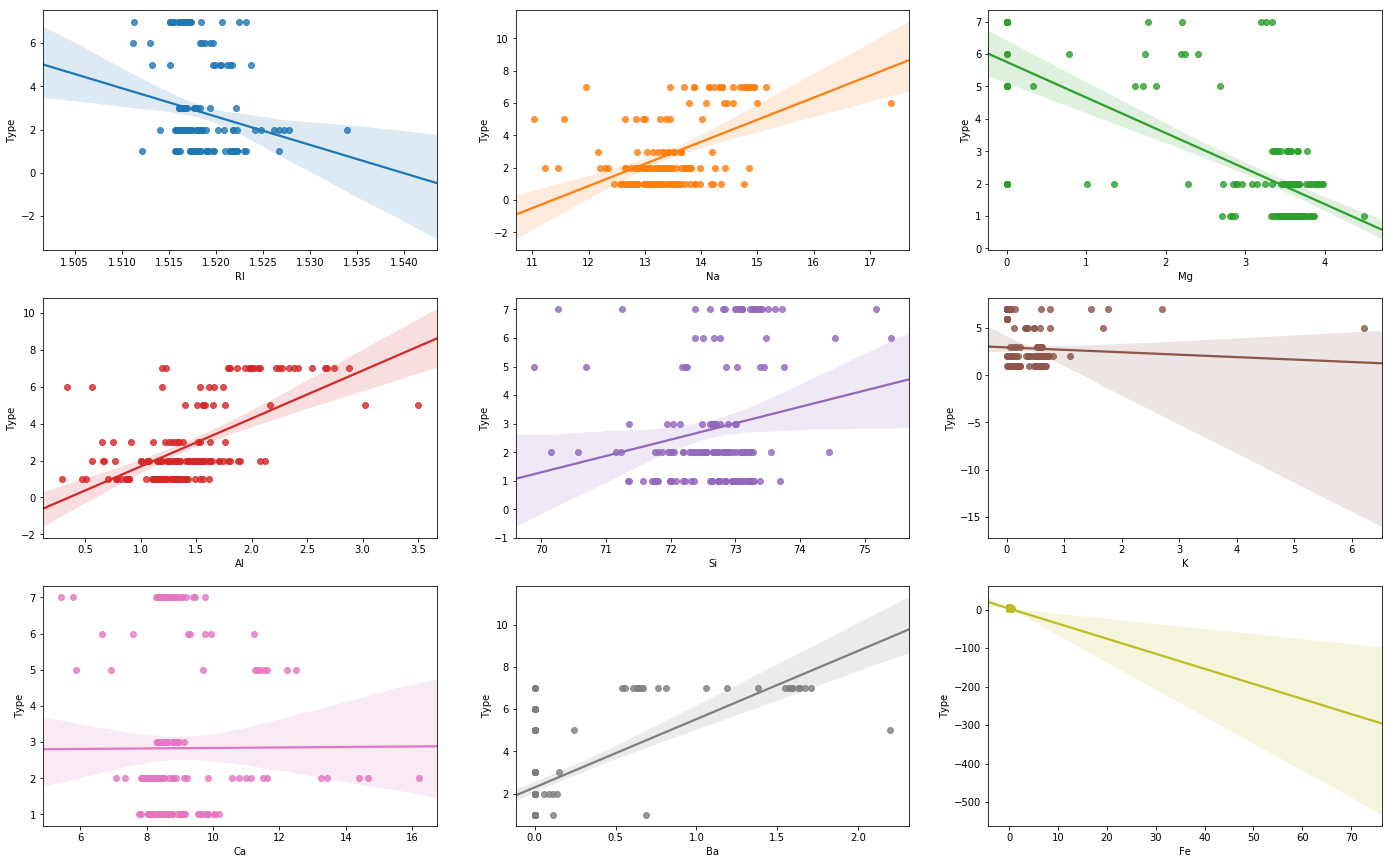

In [6]:
train_data_frame, test_data_frame = train_test_split(training_dataset, test_size=0.2)
figure, ax = plt.subplots(3,3, figsize=(24,15))
sns.regplot(x=train_data_frame["RI"], y=train_data_frame["Type"], ax=ax[0,0])
sns.regplot(x=train_data_frame["Na"], y=train_data_frame["Type"], ax=ax[0,1])
sns.regplot(x=train_data_frame["Mg"], y=train_data_frame["Type"], ax=ax[0,2])
sns.regplot(x=train_data_frame["Al"], y=train_data_frame["Type"], ax=ax[1,0])
sns.regplot(x=train_data_frame["Si"], y=train_data_frame["Type"], ax=ax[1,1])
sns.regplot(x=train_data_frame["K"], y=train_data_frame["Type"], ax=ax[1,2])
sns.regplot(x=train_data_frame["Ca"], y=train_data_frame["Type"], ax=ax[2,0])
sns.regplot(x=train_data_frame["Ba"], y=train_data_frame["Type"], ax=ax[2,1])
sns.regplot(x=train_data_frame["Fe"], y=train_data_frame["Type"], ax=ax[2,2])

In [7]:
kategoricka_premenna = np_utils.to_categorical(y)

In [8]:
model = Sequential()
model.add(Dense(214, input_dim=9, activation = 'sigmoid'))
model.add(Dense(214, activation = 'sigmoid'))
model.add(Dense(8))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.fit(df, kategoricka_premenna)
scores = model.evaluate(df, kategoricka_premenna)

Epoch 1/1
214/214 [==============================] - 0s 915us/step


In [9]:
print("\nPresnosť siete: %.2f%%" %(scores[1]*100))


Presnosť siete: 7.94%
